<a href="https://colab.research.google.com/github/kavita55/Data-Science-and-Business-Analytics-Spark-Foundation-Internship/blob/main/Task2_Prediction_using_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: Prediction Using Unsupervised ML**

## __Author : Kavita  Mali__

##### __Objective : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.__

## 1. Reading and Understanding the Data

#### 1.1 Importing Required Libraries

In [1]:
# Importing Required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Importing clustering libraries
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score  

#### 1.2 Reading the Dataset 

In [2]:
# Importing iris dataset

from sklearn import datasets
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data , columns = iris.feature_names)

iris_data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
#Checking the shape of the dataset
iris_data.shape

(150, 4)

In [4]:
#Checking summary of the dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
#Check statistical summary of dataset
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 2. Defining function for Hopkins Score 

In [6]:
## Checking if the data is feasible for clustering

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

- Checking Hopkins score for iris dataset and check whether it is feasible for clustering or not.

In [7]:
# Using the function check hopkins statistic for the data
print(hopkins(iris_data))

0.8413048710437123


We can proceed with clustering as the hokins statistic is good.

# 3. Rescaling the variables

In [8]:
scaler = StandardScaler() #instantiate

#Fit_transform the data
iris_scaled = scaler.fit_transform(iris_data)

iris_scaled.shape

(150, 4)

- Creating new dataframe with Scales variables

In [9]:
#creating dataframe for the scaled variables
iris_scaled = pd.DataFrame(iris_scaled)
iris_scaled.columns = iris_data.columns
iris_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


# 4. Modelling

> ## 4.1 Find optimal number of customers

>> 4.1.2. Silhouette Analysis

In [10]:
range_n_clusters = [2,3,4,5,6,7,8]

for num in range_n_clusters:

  #initialise kmeans
  kmeans = KMeans(n_clusters = num, max_iter = 50 )
  kmeans.fit(iris_scaled)

  cluster_labels = kmeans.labels_

  #silhouette score
  silhouette_avg = silhouette_score(iris_scaled , cluster_labels)
  print("For n_clusters = {0}, the silhouette score is {1}".format(num , silhouette_avg))

For n_clusters = 2, the silhouette score is 0.5817500491982808
For n_clusters = 3, the silhouette score is 0.45994823920518635
For n_clusters = 4, the silhouette score is 0.38694104154427816
For n_clusters = 5, the silhouette score is 0.3438082743166464
For n_clusters = 6, the silhouette score is 0.33264222832384166
For n_clusters = 7, the silhouette score is 0.3250205942792502
For n_clusters = 8, the silhouette score is 0.3381185097132004


>> 4.1.2. Elbow Curve / SSD





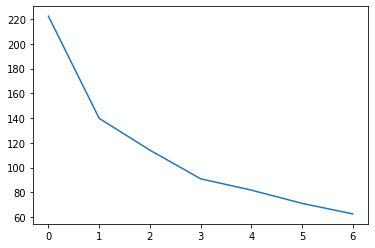

In [11]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num in range_n_clusters:
  kmeans = KMeans(n_clusters = num , max_iter = 50)
  kmeans.fit(iris_scaled)

  ssd.append(kmeans.inertia_)

#Plot SSD
plt.plot(ssd)

- from above we can conclude that 3 clusters will be enough


- Clustering with 3 clusters

In [12]:
#Final model with k = 3
kmeans = KMeans(n_clusters= 3, max_iter = 50)
kmeans.fit_predict(iris_scaled)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [13]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [14]:
#Assigning the values to dataframe
iris_data['cluster_labels'] = kmeans.labels_
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_labels
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


# 5. Visualization of model

> #### 5.1 Visualizing each column with Boxplot

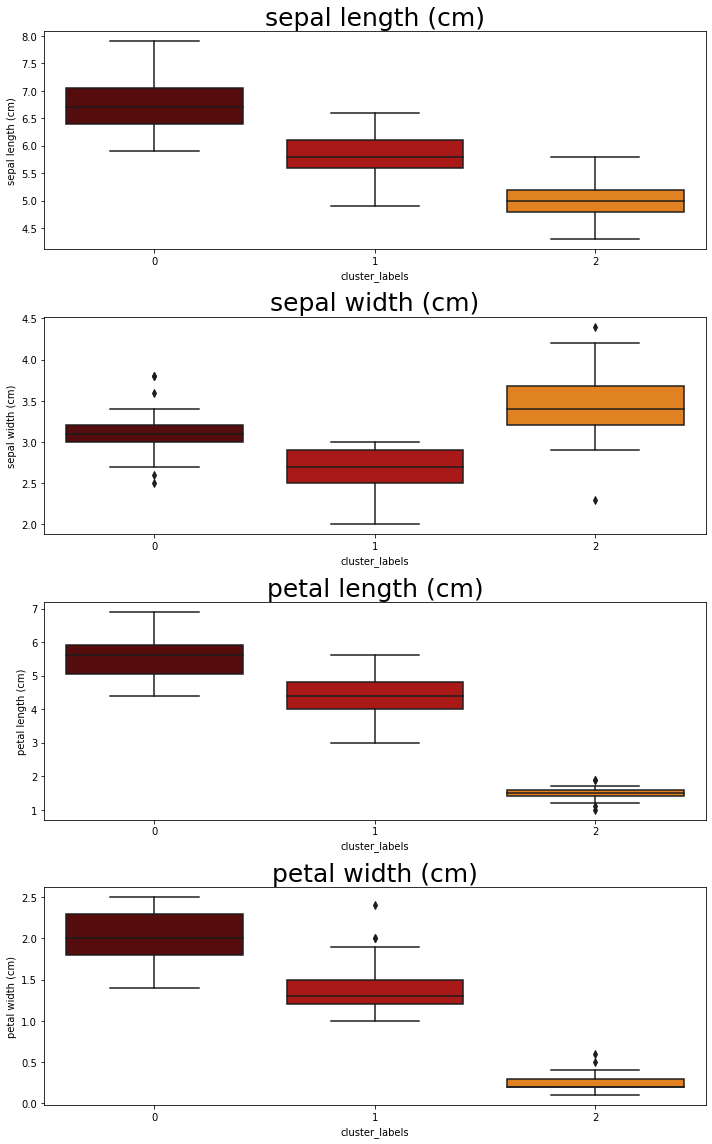

In [15]:
# Lets visualize clusters with every column

plt.figure(figsize = (10,16))

#Boxplot for Sepal length(cm)
plt.subplot(4,1,1)                          # creating subplots
plt.title('sepal length (cm)',fontsize=25)   # Adding and formatting title
sns.boxplot(x = iris_data['cluster_labels'], y=iris_data['sepal length (cm)'],palette='gist_heat',orient='v',fliersize=5)

#Boxplot for sepal width
plt.subplot(4,1,2)                         # creating subplots
plt.title('sepal width (cm)',fontsize=25)           # Adding and formatting title
sns.boxplot(x = iris_data['cluster_labels'], y = iris_data['sepal width (cm)'],palette='gist_heat',orient='v',fliersize=5)

#Boxplot for petal width
plt.subplot(4,1,3)                           # creating subplots
plt.title('petal length (cm)',fontsize=25)     # Adding and formatting title
sns.boxplot(x = iris_data['cluster_labels'], y = iris_data['petal length (cm)'],palette='gist_heat',orient='v',fliersize=5)

#Boxplot for petal length
plt.subplot(4,1,4)                           # creating subplots
plt.title('petal width (cm)',fontsize=25)     # Adding and formatting title
sns.boxplot(x = iris_data['cluster_labels'], y = iris_data['petal width (cm)'],palette='gist_heat',orient='v',fliersize=5)

plt.tight_layout()                     
plt.show()



 __Inferences__ :
- Cluster 0  have larger petal width ,larger petal length, larger sepal length and average sepal width. So from this observation we can conclude that this species is Iris-versicolour.
- Cluster 1 have average petal length, petal width and sepal length, lower sepal width . So from this observation we can conclude that this species is Iris-setosa.
- Cluster 2 have lower petal width, petal length and sepal length ,larger sepal width. So from this observation we can conclude that this species is Iris-virginica.

> #### 5.2 Visualization with Scatterplot

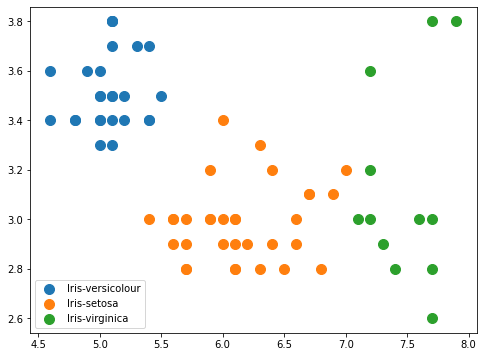

In [29]:
# sns.scatterplot( iris_data[ : , 0] , iris_data[: , 1]  , cmap = 'rainbow' , data= iris_data ,label = 'Iris-setosa')
plt.figure( figsize = (8,6))
           
plt.scatter( iris_data[ cluster_labels == 0 ,0]  ,iris_data[ cluster_labels == 0 ,1], label = 'Iris-versicolour',s=100)
plt.scatter( iris_data[ cluster_labels == 1 ,0]  ,iris_data[ cluster_labels == 1 ,1], label = 'Iris-setosa',s=100 )
plt.scatter( iris_data[ cluster_labels == 2 ,0]  ,iris_data[ cluster_labels == 2 ,1], label = 'Iris-virginica',s=100 )

plt.legend()
plt.show()